# The Best Neighborhood in Pittsburgh

## What Makes a Neighborhood 'The Best?'

For this project, we decided that in order to determine the best neighborhood, we had to take into account the safety, value, and fun within each individual neighborhood. We will be using a points system to determine the best neighborhood because the metrics we are using give us both "positive" and "negative" values when we normalize it. The final scores will be compared and the highest score will determine the best neighborhood. 

## Our Metric

The metrics we used for this project are crime/safety, property value, and facilities within each neighborhood. The property value and facities datasets will be used to generate points. The higher the value or the more facilities available, the higher the score for each neighborhood. Both crime datasets will be used to take away points. The higher the rate of crime, the more points lost.

For all the neighborhoods, each metric will be ranked on a scale from 0 to 100. This number was calculated by first finding the neighborhood with the highest 'designated value' in a specific dataset. For example, in the 'Facilities' dataset this 'designated value' would be the number of facilities in each neighborhood. Then, the 'designated value' in each neighborhood was divided by the highest 'designated value', and proceedingly was multiplied by 100. Therefore, the neighborhood with the highest 'designated value' in each dataset will get a score of 100 for that category. 

To calculate the final scores for each neighborhood to find 'the best' Pittsburgh neighborhood, the two positive metric scores were added together, and the two negative metric scores were then subtracted from this value. Because there are two positive metrics, the highest possible score for a neighborhood to recieve is a score of '200'. 


![Neighborhood in Pittsburgh](https://pittsburghfoundation.org/sites/default/files/2019-10/home-bridges-dicello.jpg)

In [2]:
import numpy as np
import pandas as pd 
import os
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict, defaultdict, Counter
from pandas import DataFrame , read_csv

### Crime/Safety

For crime and safety, we are using two different datasets. One holds arrest records and lists the neighborhood it took place in. The other holds firearm seizure records and lists the neighborhood as well. The idea is to tally up how many arrests and firearm seizures happened in each neighborhood and combine them into a single metric. The lower the value, the higher a neighborhood will rank.


![Spongebob Arrest](https://thumbs.gfycat.com/GracefulWatchfulAvocet-size_restricted.gif)


This is arrest data

In [3]:
arrests = pd.read_csv("arrests.csv")
arrests.head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [4]:
crime_count = arrests['INCIDENTNEIGHBORHOOD'].value_counts()/2168*100
crime_count2 = arrests['INCIDENTNEIGHBORHOOD'].value_counts()/2168*100*(-1)
crime_count = crime_count.sort_index(axis=0).sort_values(ascending=False)
crime_dict = crime_count2.to_dict()
print(crime_count)
print(crime_dict)

Central Business District      100.000000
South Side Flats                90.682657
Carrick                         62.084871
East Allegheny                  58.118081
Homewood South                  53.597786
Homewood North                  48.385609
East Liberty                    46.402214
Marshall-Shadeland              39.852399
Mount Washington                39.206642
Bluff                           36.900369
Knoxville                       35.470480
Hazelwood                       32.887454
Brookline                       32.426199
Lincoln-Lemington-Belmar        32.380074
Beechview                       32.333948
Allegheny Center                30.996310
Sheraden                        30.673432
Perry South                     29.750923
Brighton Heights                28.597786
East Hills                      27.029520
Middle Hill                     26.568266
Bloomfield                      26.014760
Allentown                       25.369004
Shadyside                       25

Text(0.5,1,'Crime Data')

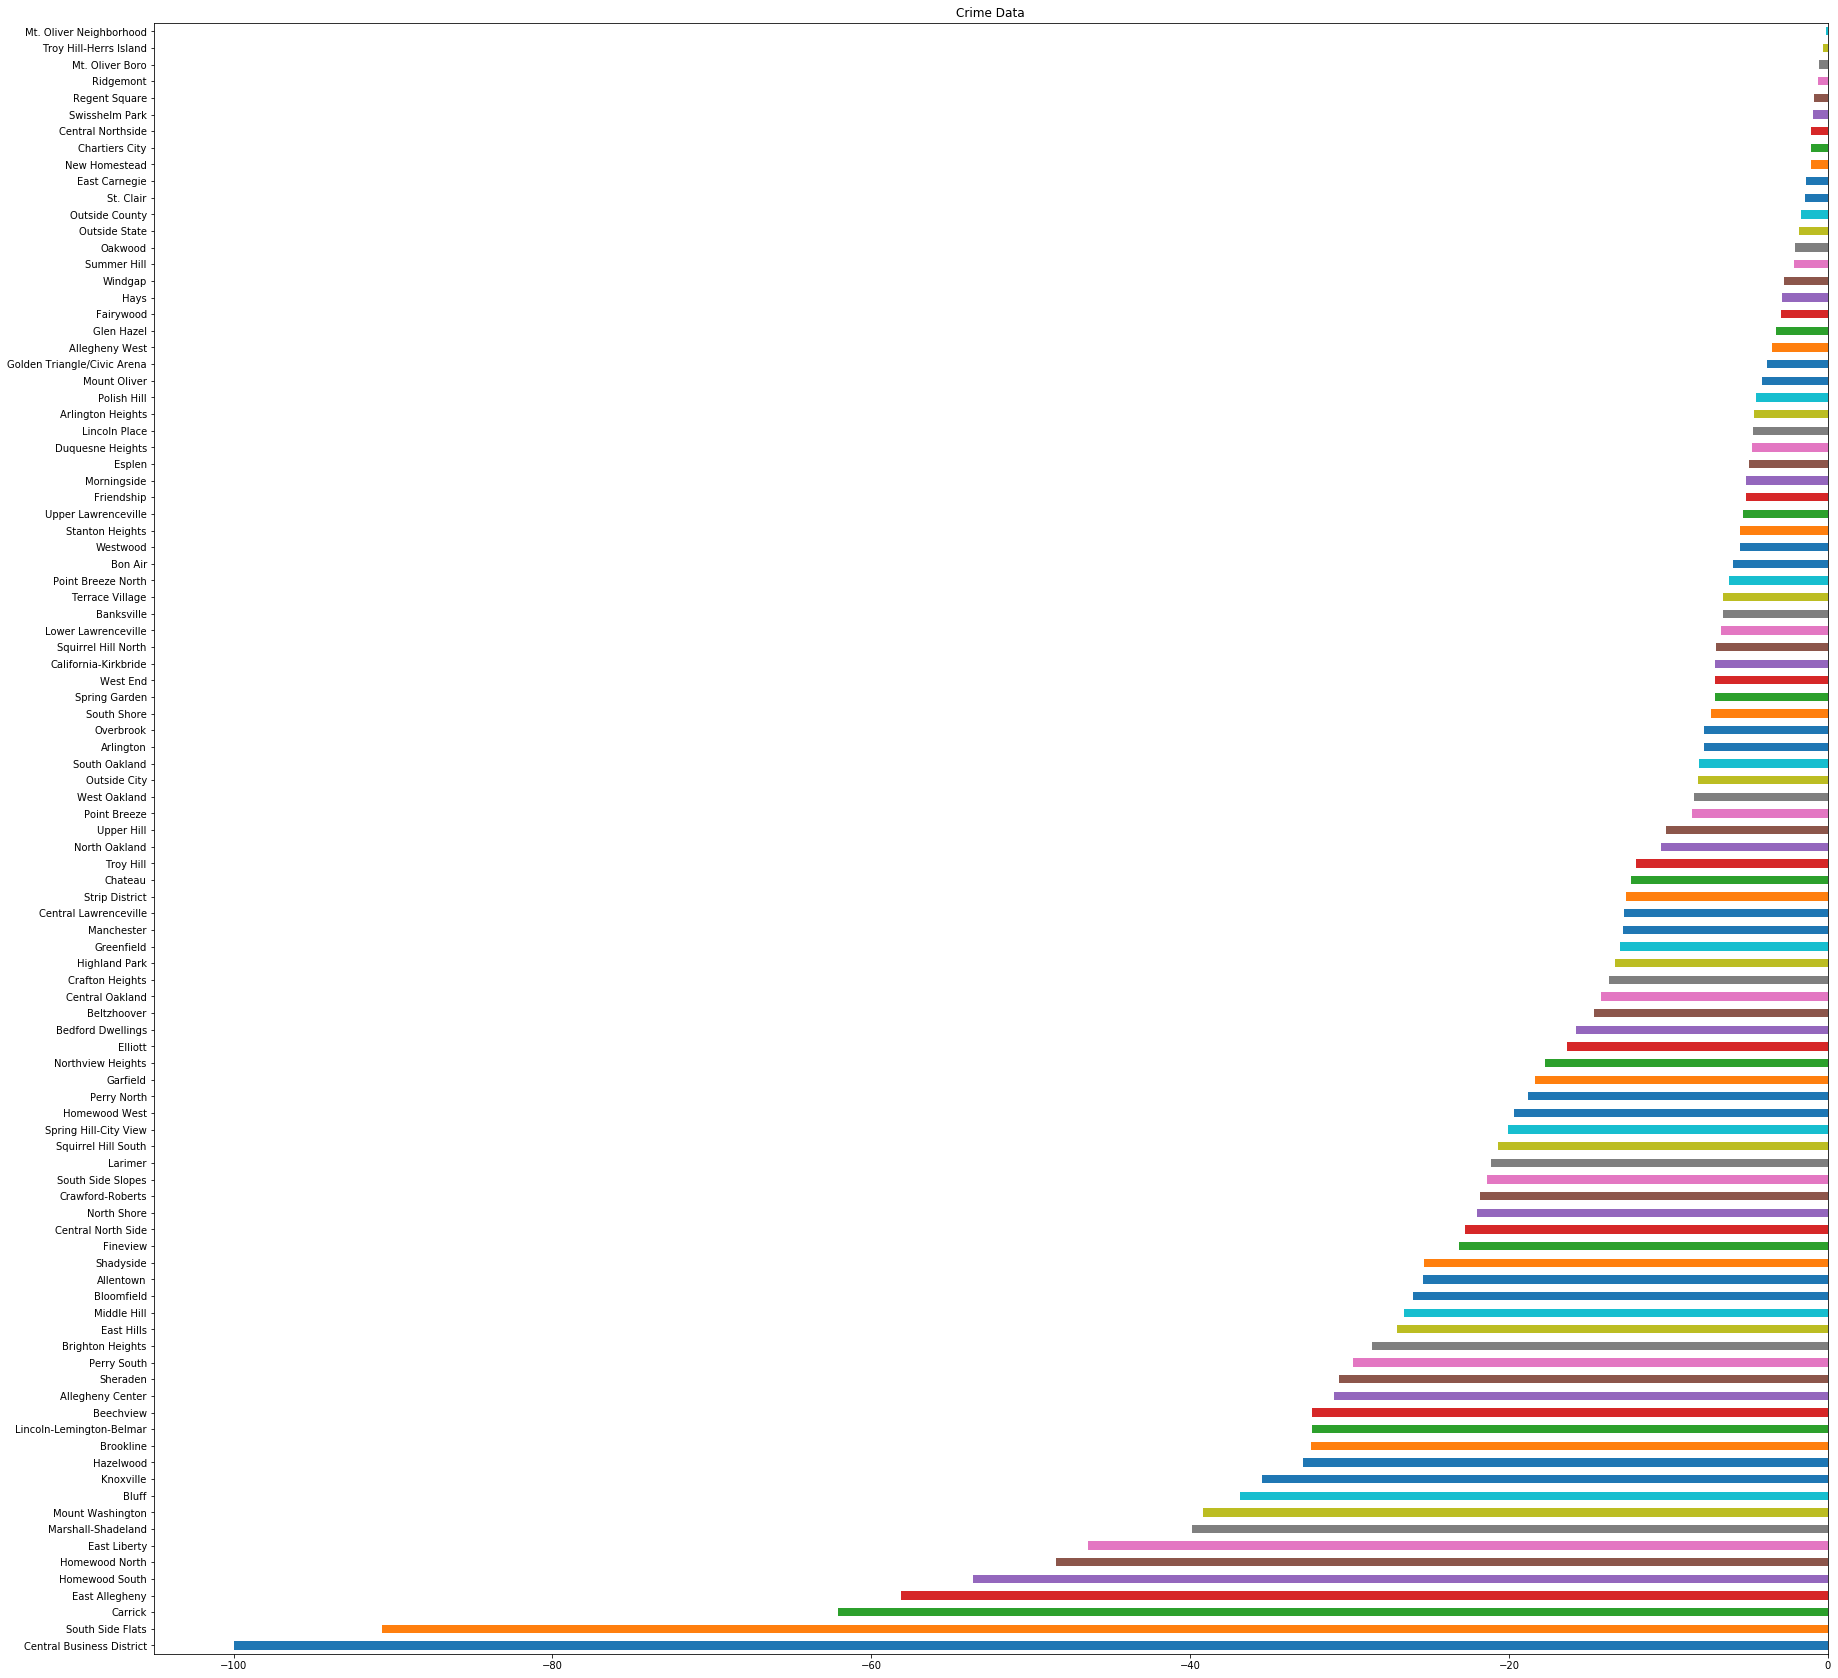

In [5]:
crimeD = pd.Series(crime_dict, name='DateValue')
crimeD.plot.barh(stacked = True, figsize=(30,30))
plt.title("Crime Data")

This is firearm data

In [7]:
firearms = pd.read_csv("firearms.csv")
firearms.head(5)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1000 BLOCK 2ND AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2017,3,1,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
1,"1000 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2017,4,6,Bluff,6.0,1.0,4.200301e+10,3.0,2,2-4,40.438573,-79.990840
2,"1000 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2015,8,1,Bluff,6.0,1.0,4.200301e+10,3.0,2,2-4,40.438573,-79.990840
3,"1000 BLOCK BEECHER ST PITTSBURGH, PA 15208",1,0,0,1,0,0,2015,11,5,Homewood West,9.0,12.0,4.200312e+10,2.0,5,3-17,40.459825,-79.902389
4,"1000 BLOCK BIDWELL ST PITTSBURGH, PA 15233",1,0,1,0,0,0,2016,9,0,Manchester,6.0,21.0,4.200321e+10,1.0,1,1-8,40.452335,-80.020418


In [8]:
firearm_neighborhood = firearms.groupby('neighborhood')
num_firearms = firearm_neighborhood['total_count'].sum().sort_values(ascending=False)/193*100
num_firearms2 = firearm_neighborhood['total_count'].sum().sort_values(ascending=False)/193*100*(-1)
firearm_dict = num_firearms2.to_dict()
print(num_firearms)
print(firearm_dict)

neighborhood
Homewood South               100.000000
South Side Flats              64.766839
Larimer                       53.886010
Homewood North                50.777202
Carrick                       50.259067
Marshall-Shadeland            48.704663
Hazelwood                     48.186528
Lincoln-Lemington-Belmar      45.077720
Perry South                   41.968912
Sheraden                      39.896373
Central Business District     39.378238
Knoxville                     37.823834
Garfield                      36.269430
Middle Hill                   33.160622
East Liberty                  32.642487
Brighton Heights              32.642487
Central Northside             32.124352
Mount Washington              31.606218
East Hills                    31.606218
Allentown                     31.088083
Bedford Dwellings             29.015544
Beechview                     27.979275
Brookline                     24.352332
Manchester                    23.834197
Fineview                   

Text(0.5,1,'Firearm Data')

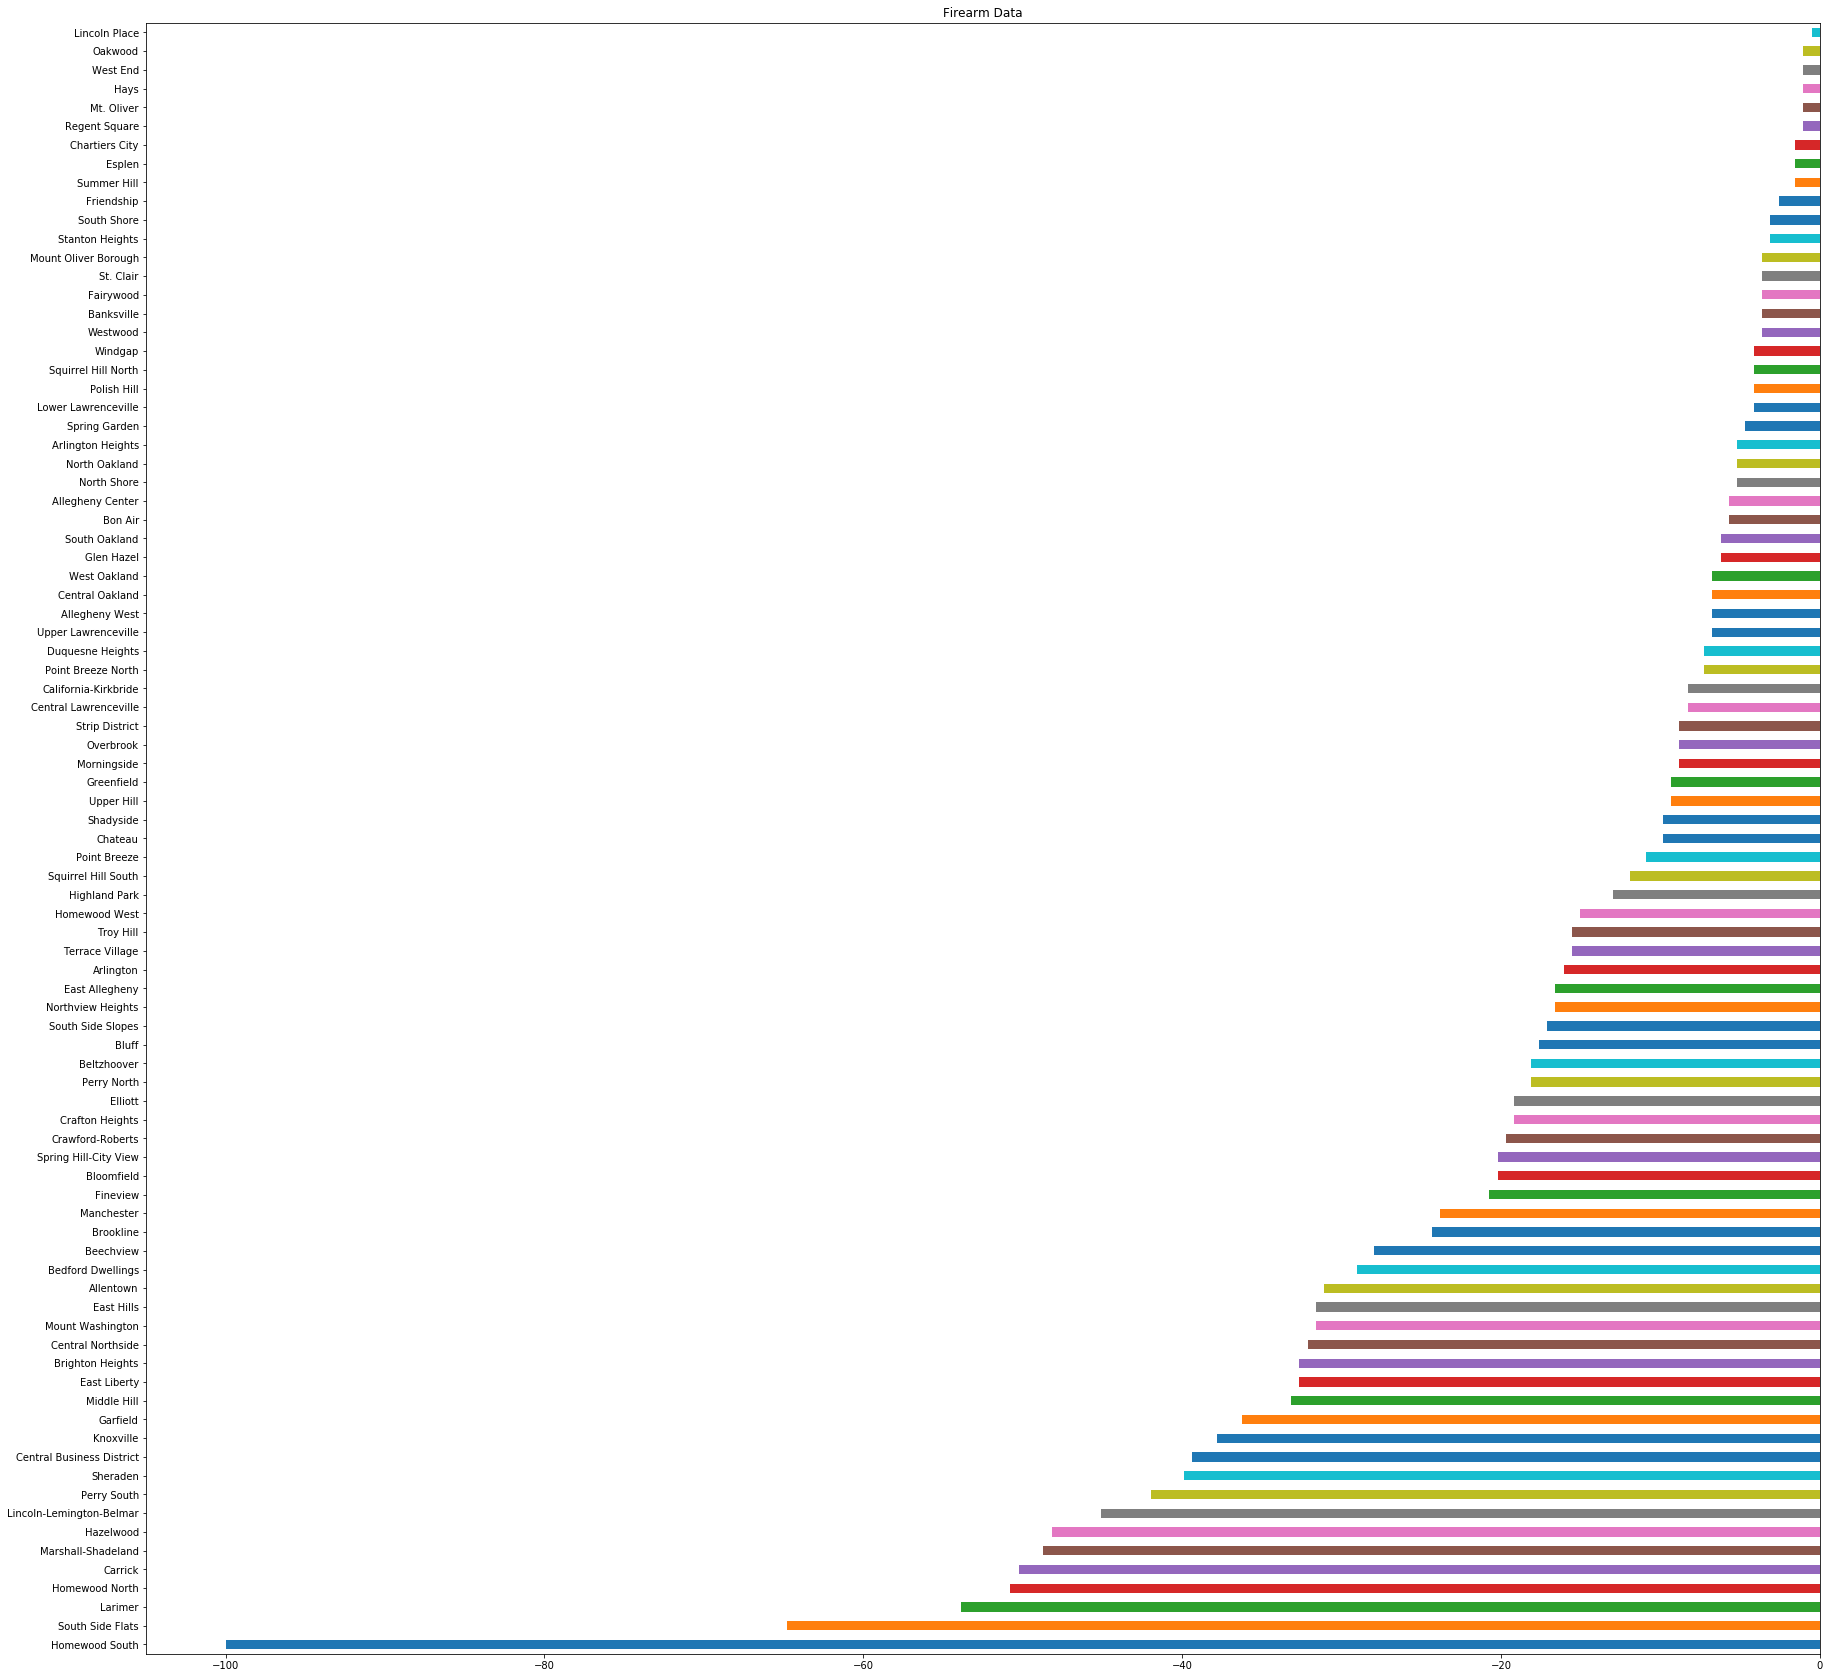

In [9]:
fireD = pd.Series(firearm_dict, name='DateValue')
fireD.plot.barh(stacked = True, figsize=(30,30))
plt.title("Firearm Data")

### Housing Value

The dataset we are using for property value gives an estimate of the amount of properties within a neighborhood that fall within a certain value range. Each range was assigned a multiplier that got increasingly higher as the value range increased. This was used to create a metric that represents the value of the neighborhood's homes as a whole.

![Houses in Pittburgh](https://upload.wikimedia.org/wikipedia/commons/1/15/2014-09-08-Troy-Hill-01.jpg)

In [10]:
property_values = pd.read_csv("propertyValue.csv")
property_values.head(5)

,_id,Neighborhood,EstimateTotal,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,24,25,26
0,1,Allegheny Center,72,0,0,0,0,0,0,0,...,29,12,0,0,0,0,0,0,0,0
1,2,Allegheny West,69,4,0,0,0,0,0,0,...,0,4,15,21,0,0,0,11,0,0
2,3,Allentown,538,45,19,22,44,100,49,24,...,0,0,0,0,0,6,0,0,0,0
3,4,Arlington,492,12,29,5,43,27,45,49,...,0,2,0,0,0,7,0,3,0,0
4,5,Arlington Heights,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
property_total = property_values.iloc[:,1:3]
i = 1
i = int(i)
x = .1
x = int(x)
avg = 705
avg = int(avg)
while i < 27:
    i = str(i)
    property_values[i] = property_values[i]*x
    i = int(i)
    i = i + 1
    x = x + .1
    
property_total['EstimateTotal']=property_values.iloc[:,3:30].sum(axis=1)/5448.8*100
property_total = property_total.sort_values(by=['EstimateTotal'],ascending=False)
property_dict = property_total.set_index('Neighborhood')['EstimateTotal'].to_dict()
print(property_total)
print(property_dict)

                Neighborhood  EstimateTotal
77       Squirrel Hill South     100.000000
13                 Brookline      87.428425
76       Squirrel Hill North      69.224416
68                 Shadyside      62.991851
63              Point Breeze      52.818969
36                Greenfield      48.669432
12          Brighton Heights      48.249156
15                   Carrick      45.209954
39             Highland Park      44.297827
9                 Bloomfield      41.056746
7                  Beechview      40.051020
72          South Side Flats      39.061812
79           Stanton Heights      38.054250
53          Mount Washington      37.808325
45             Lincoln Place      24.889884
60                 Overbrook      24.640288
17     Central Lawrenceville      24.353986
5                 Banksville      23.930040
56             North Oakland      22.994054
61               Perry North      21.947952
89                  Westwood      21.549699
51               Morningside    

Text(0.5,1,'Property Data')

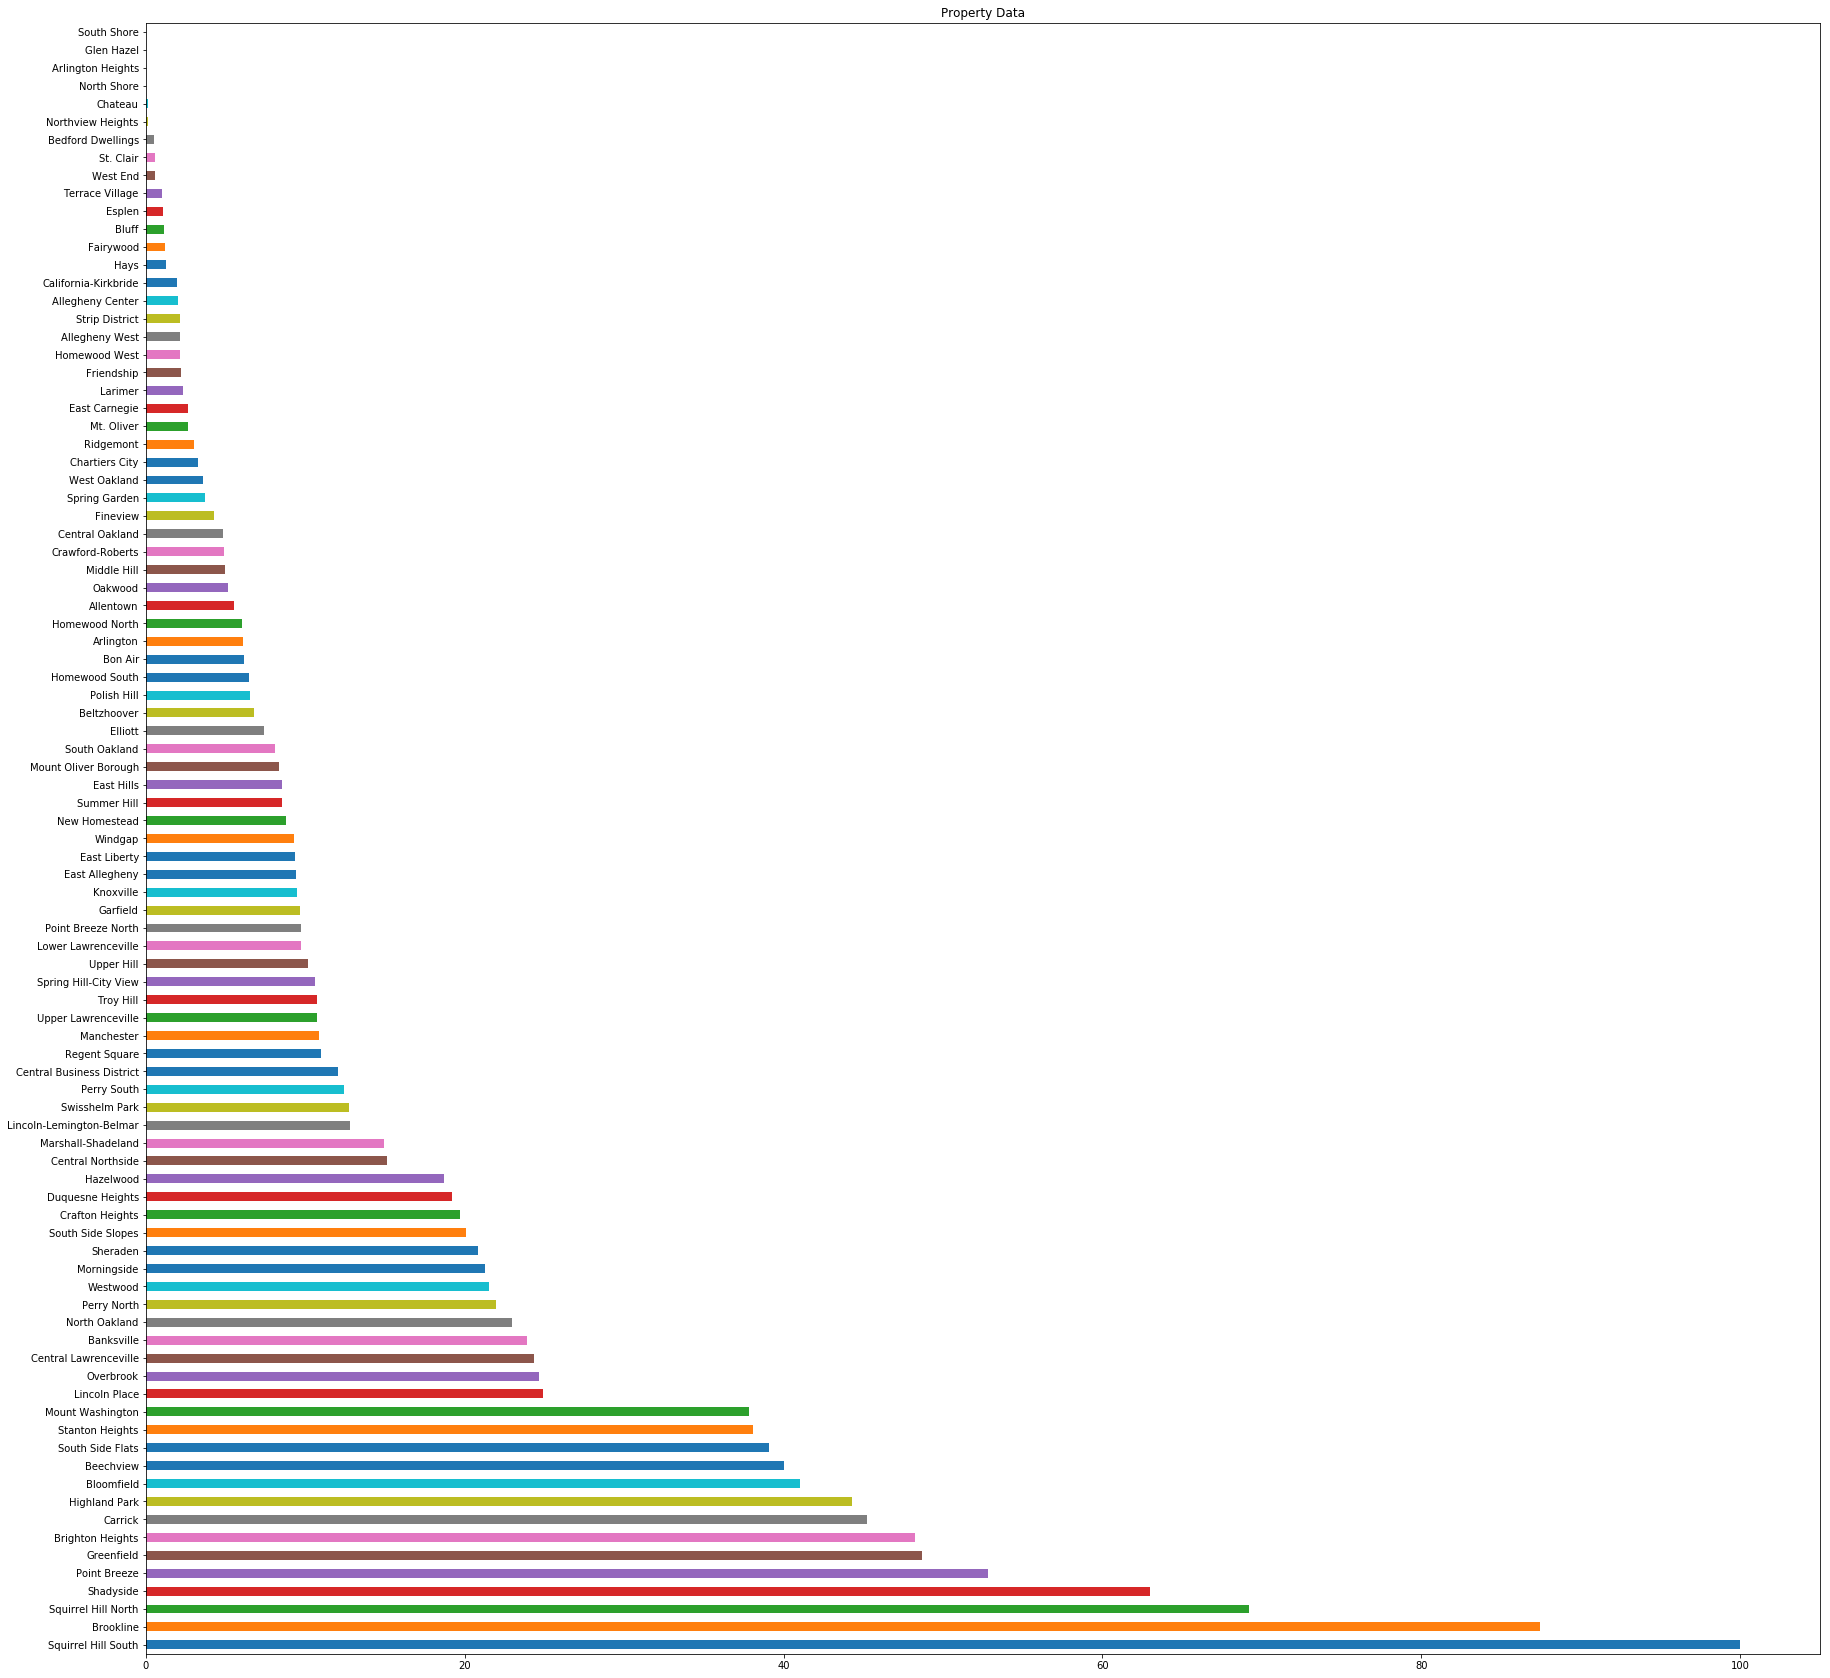

In [12]:
propD = pd.Series(property_dict, name='DateValue')
propD.plot.barh(stacked = True, figsize=(30,30))
plt.title("Property Data")

### Facilities

Our facilities dataset lists things like shelters, pools, utilities, amongst other things. The total number of facilities in each neighborhood will determine a point value.

In [13]:
fac = pd.read_csv("Facilities Data.csv")
fac.head(5)

,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,zip,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,NaN,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485658,-79.946446
1,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,NaN,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440464,-79.984103
2,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,15212.0,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453091,-80.005339
3,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,15219.0,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448727,-79.977853
4,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,15210.0,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418144,-79.974468


In [14]:
neigh_count = fac['neighborhood'].value_counts()
neigh_count = neigh_count.sort_index(axis=0).sort_values(ascending=False)/30*100
neigh_dict = neigh_count.to_dict()
print(neigh_count)
print(neigh_dict)

Highland Park                100.000000
Squirrel Hill South           96.666667
Perry North                   66.666667
Brookline                     63.333333
Strip District                50.000000
Hazelwood                     46.666667
Brighton Heights              46.666667
Carrick                       40.000000
Elliott                       36.666667
South Side Slopes             36.666667
Lincoln-Lemington-Belmar      36.666667
Morningside                   33.333333
Point Breeze                  26.666667
Beltzhoover                   23.333333
Lower Lawrenceville           23.333333
Sheraden                      23.333333
Shadyside                     23.333333
Mount Washington              23.333333
Central Business District     23.333333
Bloomfield                    20.000000
Homewood West                 20.000000
Spring Hill-City View         20.000000
Beechview                     20.000000
Bedford Dwellings             20.000000
Lincoln Place                 16.666667


Text(0.5,1,'Facilities Data')

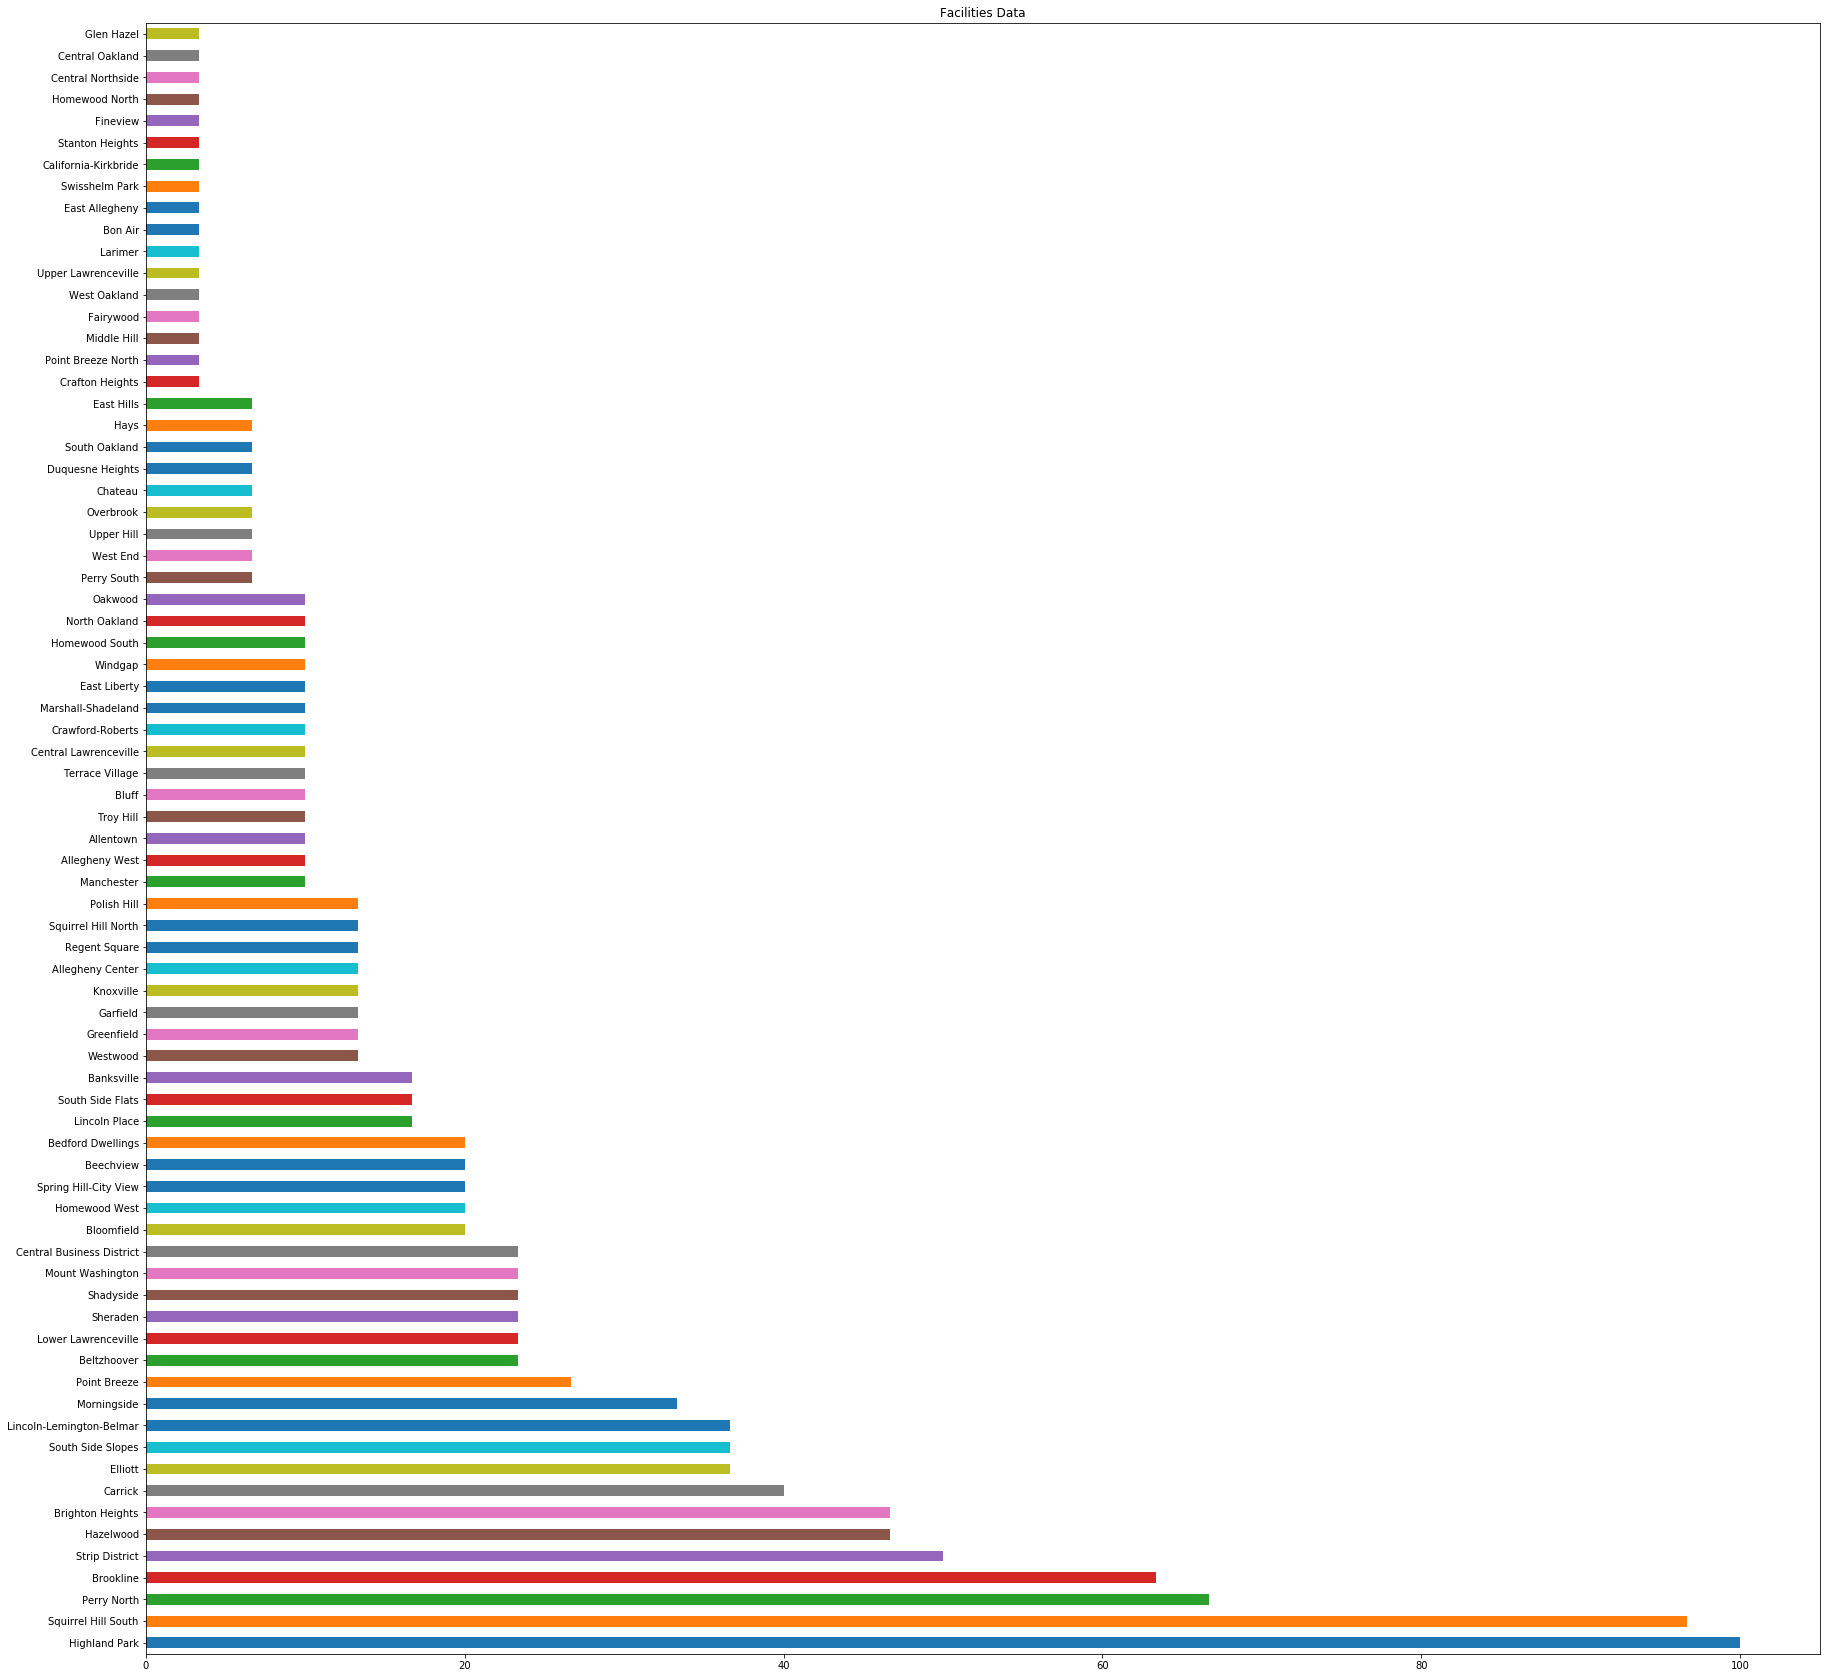

In [15]:
facD = pd.Series(neigh_dict, name='DateValue')
facD.plot.barh(stacked = True, figsize=(30,30))
plt.title("Facilities Data")

## Putting it All Together
To account for both 'good' and 'bad' metrics, we had to create a sum of positive metrics and then subtract the sum of negative metrics

In [16]:
a = property_dict
b = neigh_dict
c = firearm_dict
d = crime_dict
positive_dict = dict(Counter(a)+Counter(b))
positive = positive_dict
negative_dict = dict(Counter(c)-Counter(d))
negative = negative_dict
final_dict = dict(Counter(positive)-Counter(negative))
print(positive_dict)
print(negative_dict)
print(final_dict)

{'Squirrel Hill South': 196.66666666666669, 'Brookline': 150.76175794058628, 'Squirrel Hill North': 82.55774971859248, 'Shadyside': 86.32518475015907, 'Point Breeze': 79.48563598101111, 'Greenfield': 62.00276513483092, 'Brighton Heights': 94.91582244408553, 'Carrick': 85.20995448539126, 'Highland Park': 144.29782704448687, 'Bloomfield': 61.05674643958303, 'Beechview': 60.05102040816327, 'South Side Flats': 55.728478441736414, 'Stanton Heights': 41.38758381050262, 'Mount Washington': 61.141658102089764, 'Lincoln Place': 41.556550677825086, 'Overbrook': 31.306954436450837, 'Central Lawrenceville': 34.353986198796065, 'Banksville': 40.596706308422654, 'North Oakland': 32.99405373660255, 'Perry North': 88.61461850927421, 'Westwood': 34.8830323496305, 'Morningside': 54.60774237752655, 'Sheraden': 44.18563108696716, 'South Side Slopes': 56.757328830812895, 'Crafton Heights': 23.01473107228503, 'Duquesne Heights': 25.883741986003034, 'Hazelwood': 65.34233837419859, 'Central Northside': 18.477

Here we took this mess of data and put it into a dataframe so we could print it out and get a good look at the totals

In [25]:
final_df = pd.DataFrame.from_dict(final_dict, orient = 'index')
final_df = final_df.sort_values(by=[0],ascending=False)
print(final_df)

                                   0
Squirrel Hill South       187.873433
Highland Park             143.874811
Brookline                 142.687890
Brighton Heights           94.915822
Perry North                87.930145
Squirrel Hill North        79.691757
Point Breeze               79.485636
Carrick                    73.384151
Shadyside                  70.846866
Hazelwood                  65.342338
Greenfield                 58.321810
Beechview                  55.696347
Bloomfield                 55.249240
Morningside                54.607742
Mount Washington           53.541234
South Side Slopes          52.453560
Lincoln-Lemington-Belmar   49.478662
Strip District             48.289403
Sheraden                   44.185631
Elliott                    44.106837
Stanton Heights            39.007462
Banksville                 37.673834
Lincoln Place              37.369888
Westwood                   32.974920
Overbrook                  31.306954
Spring Hill-City View      30.628028
L

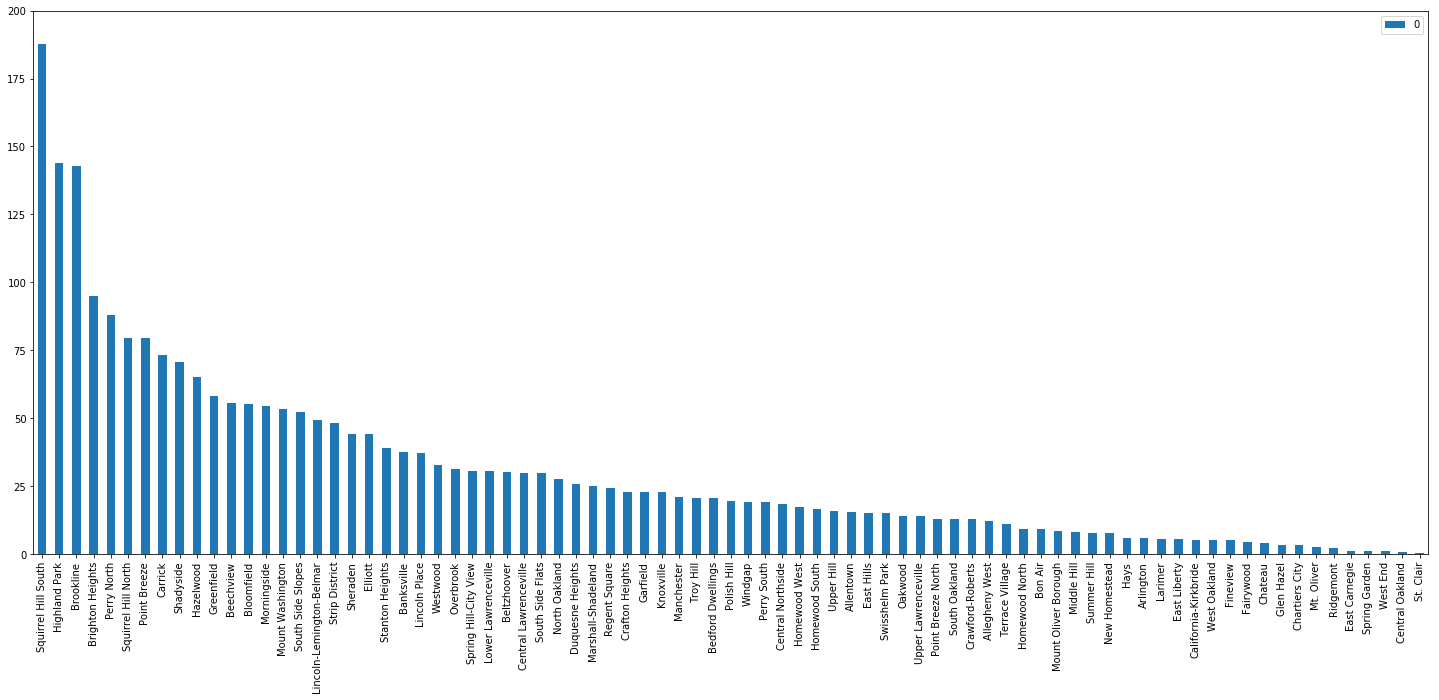

In [26]:
final_df.plot(kind="bar", width = .5, figsize=(25,10), ylim =(0,200))

# In Conclusion
## The three best neighborhoods in Pittsburgh are:
1. Squirrel Hill South
2. Highland Park
3. Brookline

![Squirrel Hill South](https://live.staticflickr.com/7428/15898966734_8f58b1c07b_b.jpg)

Squirrel Hill South is consistantly ranked as one of the best neighborhoods to live in Pittsburgh on many sources. Therefore, it is not extremely suprising that is was ranked as the number one place to live given our metrics. From personal experience, Squirrel Hill does have many nice ammenities and things to do, making it a nice neighborhood overall. One thing that was shocking was the fact that Central Oakland was ranked with the second lowest score of all the neighborhoods. A reason this may be is that our dataset primarily based things based on solely the quantity of any given thing per neighborhood, without necesarily considering the size or population. This may cause smaller neighborhoods, such as Central Oakland, to be more unfavorably ranked. 

Additionally, not all of the neighborhoods were included in each of the datasets we used. This also causes some neighborhoods to be excluded from our data analysis. 
